In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
import warnings
warnings.filterwarnings('ignore')

#import pickle
#import requests
#import json

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Using errors='coerce'.It will ignore all non-numeric values, It will replace all non-numeric values with NaN
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
#df = df.fillna(df["TotalCharges"].mean())
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

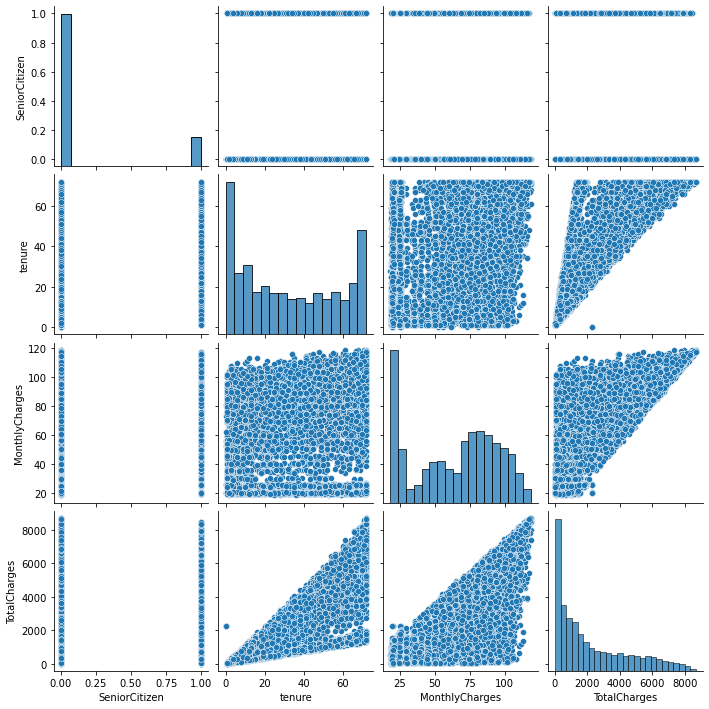

In [22]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

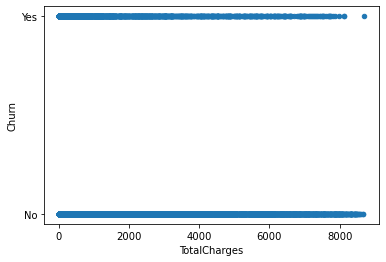

In [16]:
df.plot(kind='scatter',x='TotalCharges',y='Churn')

<AxesSubplot:>

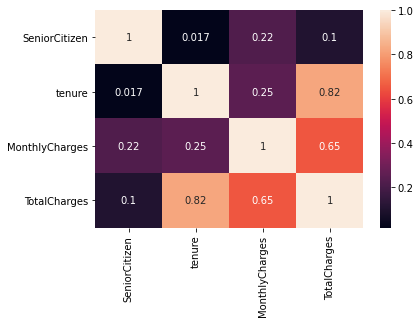

In [19]:
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

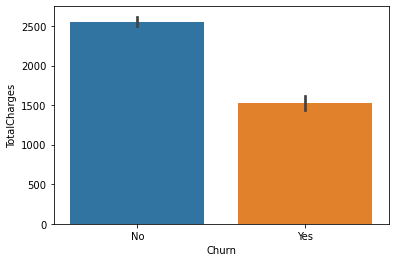

In [23]:
sns.barplot(x='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

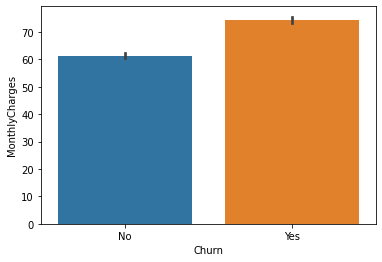

In [24]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

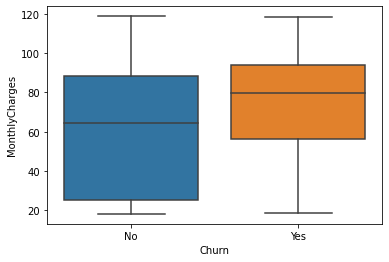

In [15]:
#Customers who have churned, have high monthly charges.
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

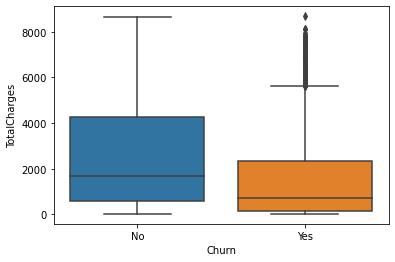

In [16]:
#The Customers who have churner, have low total charges.
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df)

In [27]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


In [29]:
df['Churn'].value_counts()

(No                  3390
 Yes                 2971
 No phone service     682
 Name: MultipleLines, dtype: int64,
 No     5174
 Yes    1869
 Name: Churn, dtype: int64)

In [30]:
df2=df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
                  'MultipleLines', 'DeviceProtection','TechSupport','PaperlessBilling',
                  'OnlineSecurity','OnlineBackup'],axis=1)

In [31]:
df2.isnull().sum()

PhoneService       0
InternetService    0
StreamingTV        0
StreamingMovies    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [29]:
#df2=df2.dropna()

In [32]:
df2

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,DSL,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Yes,DSL,No,No,One year,Mailed check,56.95,1889.50,No
2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,No,DSL,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7039,Yes,Fiber optic,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,No,DSL,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,Yes,Fiber optic,No,No,Month-to-month,Mailed check,74.40,306.60,Yes


In [33]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df2['PhoneService']=LE.fit_transform(df2['PhoneService'])
df2['InternetService']=LE.fit_transform(df2['InternetService'])
df2['StreamingTV']=LE.fit_transform(df2['StreamingTV'])
df2['StreamingMovies']=LE.fit_transform(df2['StreamingMovies'])
df2['Contract']=LE.fit_transform(df2['Contract'])
df2['PaymentMethod']=LE.fit_transform(df2['PaymentMethod'])
df2['Churn']=LE.fit_transform(df2['Churn'])

In [34]:
df2

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,2,29.85,29.85,0
1,1,0,0,0,1,3,56.95,1889.50,0
2,1,0,0,0,0,3,53.85,108.15,1
3,0,0,0,0,1,0,42.30,1840.75,0
4,1,1,0,0,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,1,0,2,2,1,3,84.80,1990.50,0
7039,1,1,2,2,1,1,103.20,7362.90,0
7040,0,0,0,0,0,2,29.60,346.45,0
7041,1,1,0,0,0,3,74.40,306.60,1


In [35]:
# Phone Service: No=0, Yes=1
# Internet Service: DSL=0, Fiber optic=1, No=2
# Streaming Tv and Streaming Movies: No=0, Yes=1
# Contract: Month-to-month=0, One year=1, Two year=2
# Payment Method: Bank transfer=0, Credit card=1, Electronic check=2, Mailed check=3
# Churn: No=0, Yes=1

In [36]:
df2.iloc[:,:-1]

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,2,29.85,29.85
1,1,0,0,0,1,3,56.95,1889.50
2,1,0,0,0,0,3,53.85,108.15
3,0,0,0,0,1,0,42.30,1840.75
4,1,1,0,0,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,1,0,2,2,1,3,84.80,1990.50
7039,1,1,2,2,1,1,103.20,7362.90
7040,0,0,0,0,0,2,29.60,346.45
7041,1,1,0,0,0,3,74.40,306.60


In [37]:
df2.iloc[:,-1]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [38]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

In [41]:
len(X_train) , len(X_test)

(5634, 1409)

In [42]:
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]])

In [43]:
model = RandomForestClassifier()

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=model.predict(X_test)

In [45]:
model.score(X_train, y_train)

0.9946751863684771

In [46]:
model.score(X_test,y_test)

0.7693399574166075

In [47]:
param_grid = {'n_estimators': [1, 30,100], 'max_features': ['auto', 'log2'], 'max_depth': [4,6, 8,10]}

In [48]:
cv_model=GridSearchCV(estimator=model,param_grid=param_grid,cv=10,scoring='recall',n_jobs=-1)
cv_model.fit(X_train,y_train)
cv_model.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 30}

In [49]:
best_model= RandomForestClassifier(max_depth=10,max_features='log2',n_estimators=30)
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=30)

In [50]:
y_pred=best_model.predict(X_test)

In [51]:
print(best_model.score(X_train, y_train))

0.8635072772452964


In [52]:
print(best_model.score(X_test,y_test))

0.8019872249822569


In [53]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

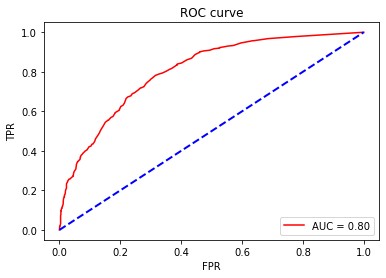

In [54]:
plt.figure()
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [56]:
#pickle.dump(best_model, open('model_Churn1.pkl','wb'))